In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('profiles.csv')
#print(len(df.location))
loc_col = df.location

true_list = []
for loc in loc_col:
    true_list.append("california" in loc)
#print(true_list)
#All profiles in the sample are from Calofornia in the US
#print(df.income)
print(df.head(10))
#print(df.religion.unique())

   age       body_type               diet      drinks      drugs  \
0   22  a little extra  strictly anything    socially      never   
1   35         average       mostly other       often  sometimes   
2   38            thin           anything    socially        NaN   
3   23            thin         vegetarian    socially        NaN   
4   29        athletic                NaN    socially      never   
5   29         average    mostly anything    socially        NaN   
6   32             fit  strictly anything    socially      never   
7   31         average    mostly anything    socially      never   
8   24             NaN  strictly anything    socially        NaN   
9   37        athletic    mostly anything  not at all      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   
5  graduate

In [2]:
list(df.columns)
#Column description:
#age: Age of the individual (continuous var.)
#body_type: Self-described body type (categorical var.)
#diet: Type of diet the individual follow (categorical var.)
#drinks: Relationship the profile has with drinking (categorical var.)
#drugs: Relationship the profile has with doing drugs (categorical var.)
#education: Education attained by the individual (categorical var.)
#essays (0-9): Answers to certain questions (string)
#ethinicity: Individual's ethnicity (categorical var.)
#height: Individual's height (continuous var.)
#income: Yearly income (continous)
#job: The individual's employment (categorical var.)
#last_online: Date of the times time the individual was online (date)
#location: Individual's location in California (categorical var.)
#offspring: Individual's stance on having children (categorical var.)
#orientation: Individual's sexual orientation (categorical var.)
#pets: If the individual has pets (categorical var.)
#religion: Religion of the individual (categorical var.)
#sex: Individual's sex (categorical var.)
#sign: Individual's sign (categorical var.)
#smokes: Relationship the profile has with smoking (categorical var.)
#speaks: Languages spoken by the individual (categorical var.)
#status: If the individual is currently in a relationship (categorical var.)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [3]:
#Cleaning/transforming the data
#Signs:
#print(df.sign.value_counts())
#print(df.head())
df["clean_signs"] = df["sign"].str.split().str.get(0)
#print(df.clean_signs.value_counts())
#Income:
df["defined_income"] = df["income"].apply(lambda x: 1 if x != -1 else 0)
df["defined_income_labels"] = df["defined_income"].apply(lambda x: "provided in the profile" if x == 1 else "unknown")
#Religion:
df["clean_rel"] = df["religion"].str.split().str.get(0)

print(df.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially        NaN   
3   23            thin         vegetarian  socially        NaN   
4   29        athletic                NaN  socially      never   

                           education  \
0      working on college/university   
1              working on space camp   
2     graduated from masters program   
3      working on college/university   
4  graduated from college/university   

                                              essay0  \
0  about me:<br />\n<br />\ni would love to think...   
1  i am a chef: this is what that means.<br />\n1...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                         

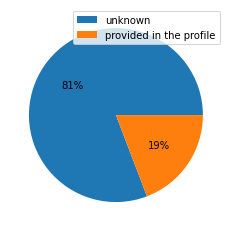

0    48442
1    11504
Name: defined_income, dtype: int64


In [4]:
#Only around one fifth of the profiles include their income
plt.pie(df.defined_income.value_counts(), autopct="%1.0f%%")
plt.legend(df.defined_income_labels)
plt.show()
print(df.defined_income.value_counts())

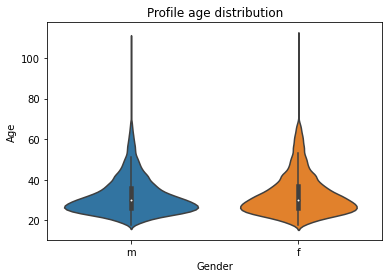

<Figure size 432x288 with 0 Axes>

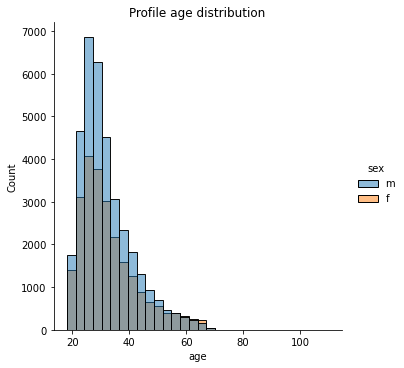

<Figure size 432x288 with 0 Axes>

In [5]:
#There is a prevalence of younger addults in the sample. 
#There are more men than women in the sample
#However, distribution-wise, there is no noticeable different distributions between the given genders
ax = sns.violinplot(y=df.age, x= df.sex)
ax.set_xlabel("Gender")
ax.set_ylabel("Age")
ax.set_title("Profile age distribution")
plt.show()
plt.clf()
ax2 = sns.displot(data=df, x="age", hue="sex", bins=30)
plt.title("Profile age distribution")
plt.show()
plt.clf()


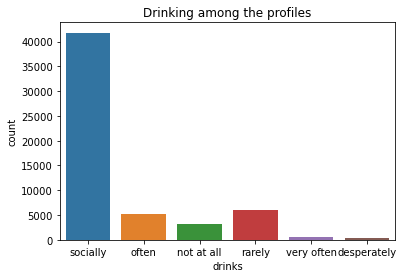

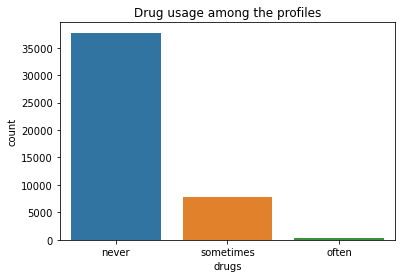

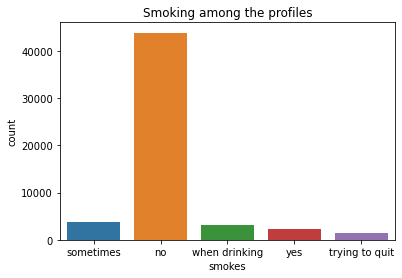

In [6]:
ax1 = sns.countplot(data=df, x=df.drinks)
ax1.set_title("Drinking among the profiles")
plt.show()
plt.clf()
ax2 = sns.countplot(data=df, x=df.drugs)
ax2.set_title("Drug usage among the profiles")
plt.show()
ax3 = sns.countplot(data=df, x=df.smokes)
ax3.set_title("Smoking among the profiles")
plt.show()

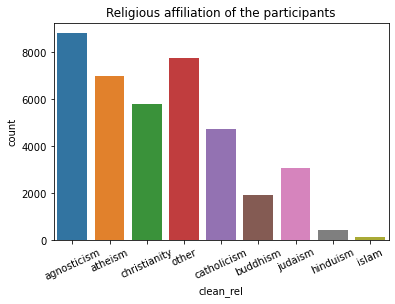

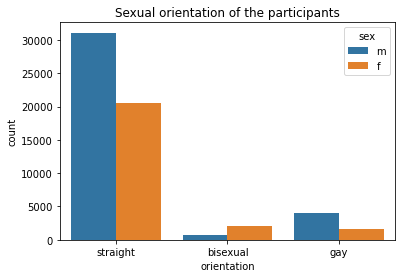

In [7]:
ax2 = sns.countplot(data=df, x=df.clean_rel)
plt.xticks(rotation = 25)
plt.title("Religious affiliation of the participants")
plt.show()
plt.clf()
ax3 = sns.countplot(data=df, x=df.orientation, hue=df.sex)
ax3.set_title("Sexual orientation of the participants")
plt.show()

In [8]:
df = df.drop(df[df.income == -1].index)
cols = ["body_type", "diet", "drinks", "drugs", "education", "height", "job", "location", "clean_rel", "sex", "clean_signs", "smokes", "income", "age"]
df = df[cols].dropna()
df.shape

(4465, 14)

In [9]:
for col in cols[:-2]:
    df = pd.get_dummies(df, columns=[col], prefix = [col])

In [10]:
print(df.head())

    income  age  body_type_a little extra  body_type_athletic  \
1    80000   35                         0                   0   
11   40000   28                         0                   0   
14   50000   29                         0                   0   
66   20000   22                         0                   1   
72  150000   35                         0                   1   

    body_type_average  body_type_curvy  body_type_fit  body_type_full figured  \
1                   1                0              0                       0   
11                  1                0              0                       0   
14                  0                0              0                       0   
66                  0                0              0                       0   
72                  0                0              0                       0   

    body_type_jacked  body_type_overweight  ...  clean_signs_pisces  \
1                  0                     0  ...    

In [11]:
col_length = len(df.columns)

X = df.iloc[:, 1:col_length]
Y = df.iloc[:, 0:1]

from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 1)

Y_train = Y_train.to_numpy().ravel()
Y_test = Y_test.to_numpy().ravel()

In [12]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression(max_iter=10000)
reg.fit(X_train, Y_train)


LogisticRegression(max_iter=10000)

In [13]:
reg.predict(X_test)
reg.score(X_test, Y_test)
#A score of 37% indicates that the model while somewhat flawed is better than random chance at guessing one's income from one's profile information

0.3706606942889138

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
performance = []
for k in range(1, 101):
    kmodel = KNeighborsClassifier(n_neighbors = k)
    kmodel.fit(X_train, Y_train)
    performance.append(kmodel.score(X_test, Y_test))
    
    
plt.plot(range(1, 101), performance)
plt.show()

print(max(performance))
#The K-neighbours model does not perform better then the logistic regression. It guesses the person's income correctly
#given the profile information slightly more than one third of the times

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, Y_train) 
tree_model.score(X_test, Y_test)

#The decision tree performs worse than the two models above guessing correctly only one fourth of the times